In [126]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString


In [127]:
# Define the latitude and longitude of the point
lat = -0.20985476660321467
lon = -78.52568864705847

# Define the Overpass API endpoint
endpoint = "https://overpass-api.de/api/interpreter"

# Define the Overpass API query --around 1000 meters
query = '[out:json][timeout:25];(way["highway"~"motorway|trunk|primary|secondary|tertiary|unclassified|residential|service|footway|pedestrian|track|cycleway|path"](around:1000,' + str(lat) + ',' + str(lon) + '););out geom;'

# Send the request to the Overpass API
response = requests.get(endpoint, params={'data': query})

# Convert the response to JSON format
data = response.json()['elements']

# Create a pandas DataFrame to store the data
df = pd.DataFrame(data)

In [128]:
# Extract values from the 'geometry' column and convert to LineString
geometry = [LineString([(d['lon'], d['lat']) for d in x]) for x in df['geometry']]
df['linestring'] = geometry

# Extract values from the 'tags' column and create new columns
df['alt_name'] = df['tags'].apply(lambda x: x['alt_name'] if 'alt_name' in x else None)
df['highway'] = df['tags'].apply(lambda x: x['highway'] if 'highway' in x else None)
df['name'] = df['tags'].apply(lambda x: x['name'] if 'name' in x else None)

# Drop the original 'tags' column
df.drop(columns=['tags', 'id', 'bounds', 'nodes', 'geometry'], inplace=True)

# Rename columns
df.rename(columns={'linestring': 'geometry'}, inplace=True)

In [129]:
df.head(10)

,type,geometry,alt_name,highway,name
0,way,"LINESTRING (-78.516947 -0.2108378, -78.5168934...",N9,residential,Joel Monroy
1,way,"LINESTRING (-78.5151247 -0.2113972, -78.515195...",N10,residential,Jose Yepez
2,way,"LINESTRING (-78.516947 -0.2108378, -78.5168932...",N9A,residential,19 de Junio
3,way,"LINESTRING (-78.5175641 -0.2128403, -78.517505...",OE10b,residential,Baños
4,way,"LINESTRING (-78.515641 -0.2099835, -78.5156972...",NI3,residential,Guatemala
5,way,"LINESTRING (-78.5172847 -0.213183, -78.5175187...",N6c,residential,Francisco Suarez
6,way,"LINESTRING (-78.5175641 -0.2128403, -78.517583...",None,residential,Oe10a
7,way,"LINESTRING (-78.5188375 -0.2160497, -78.518914...",N4,residential,Andres Zuñiga
8,way,"LINESTRING (-78.5188501 -0.212635, -78.5188865...",OE11A,residential,Lorenzo Cepeda
9,way,"LINESTRING (-78.5183308 -0.2120016, -78.518374...",OE11B,residential,Gonzalo de la Vega


In [131]:
df.highway.unique()

array(['residential', 'service', 'footway', 'unclassified', 'track',
       'path', 'pedestrian'], dtype=object)

In [133]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

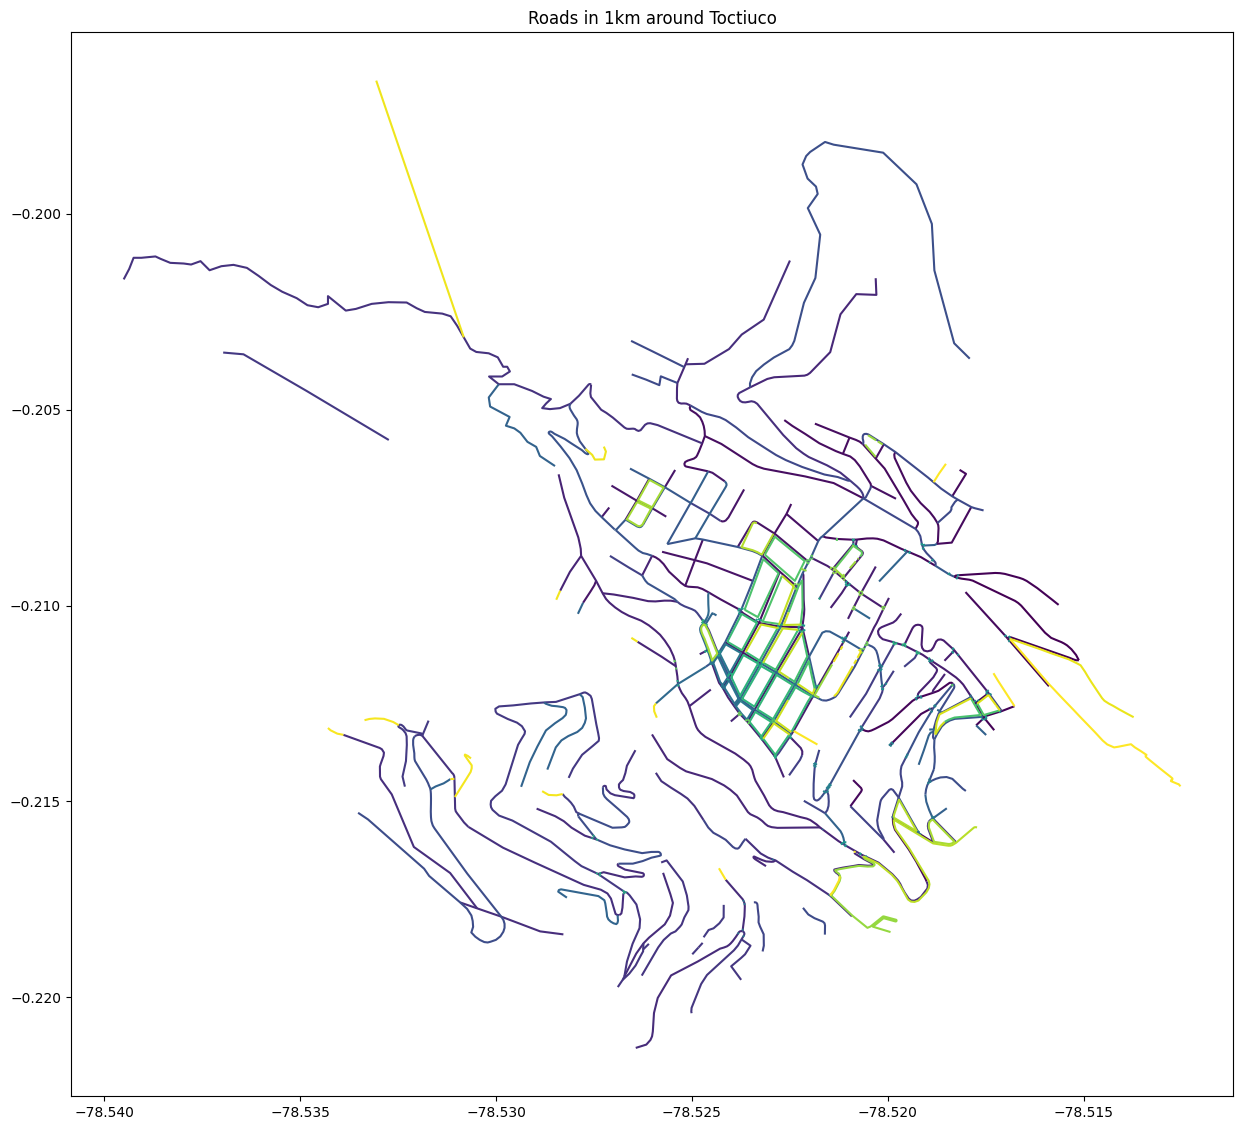

In [135]:
ax = gdf.plot(column='geometry', cmap='viridis')
ax.set_title('Roads in 1km around Toctiuco')
plt.gcf().set_size_inches(15, 15)

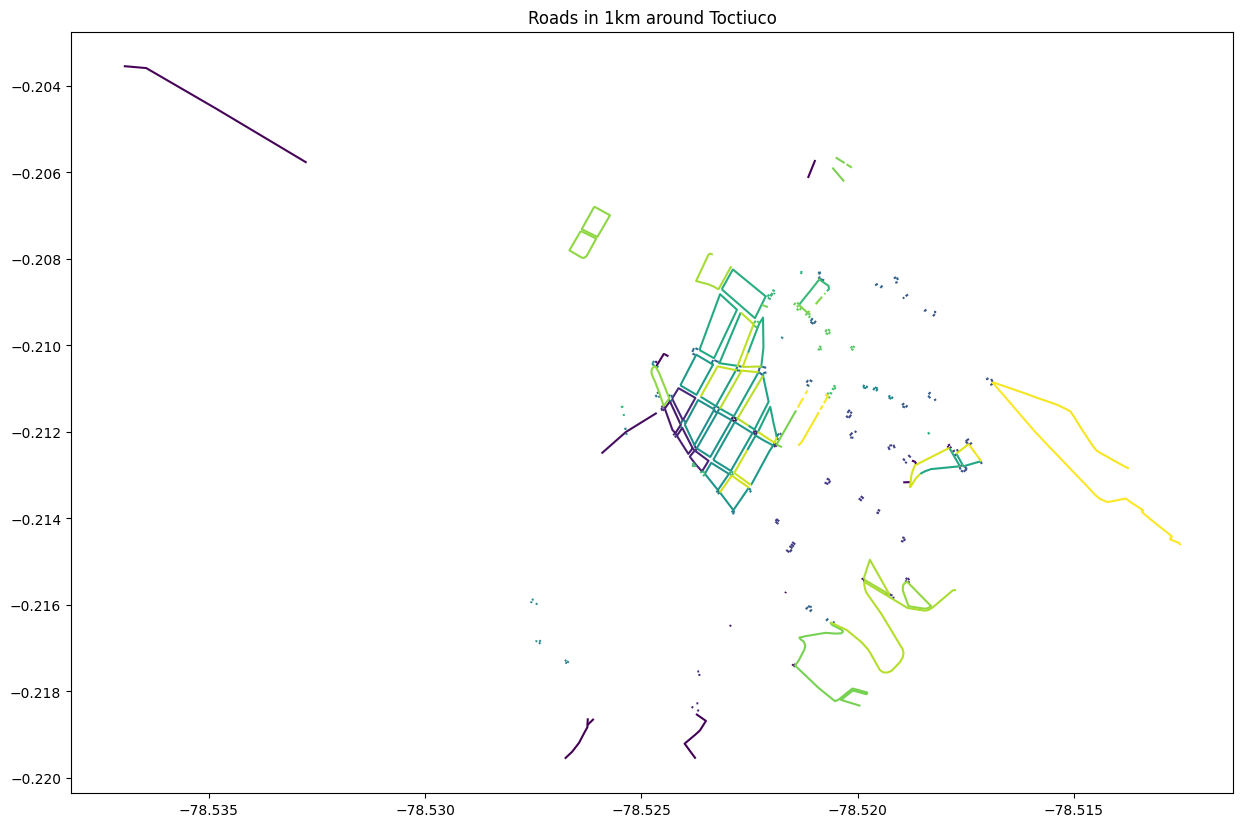

In [74]:
ax = gdf2.plot(column='geometry', cmap='viridis')
ax.set_title('Roads in 1km around Toctiuco')
plt.gcf().set_size_inches(15, 15)

Footway

In [136]:
df2 = df[df.highway == 'footway']

In [8]:
df2.head()

,type,geometry,alt_name,highway,name
21,way,"LINESTRING (-78.5209785 -0.2057135, -78.521146...",None,footway,None
99,way,"LINESTRING (-78.526768 -0.2195551, -78.5265998...",None,footway,None
100,way,"LINESTRING (-78.5237354 -0.2185222, -78.523505...",None,footway,S2h
102,way,"LINESTRING (-78.5262454 -0.2187787, -78.526099...",None,footway,None
105,way,"LINESTRING (-78.5369644 -0.2035436, -78.536445...",None,footway,None


In [137]:
gdf2 = gpd.GeoDataFrame(df2, geometry='geometry')

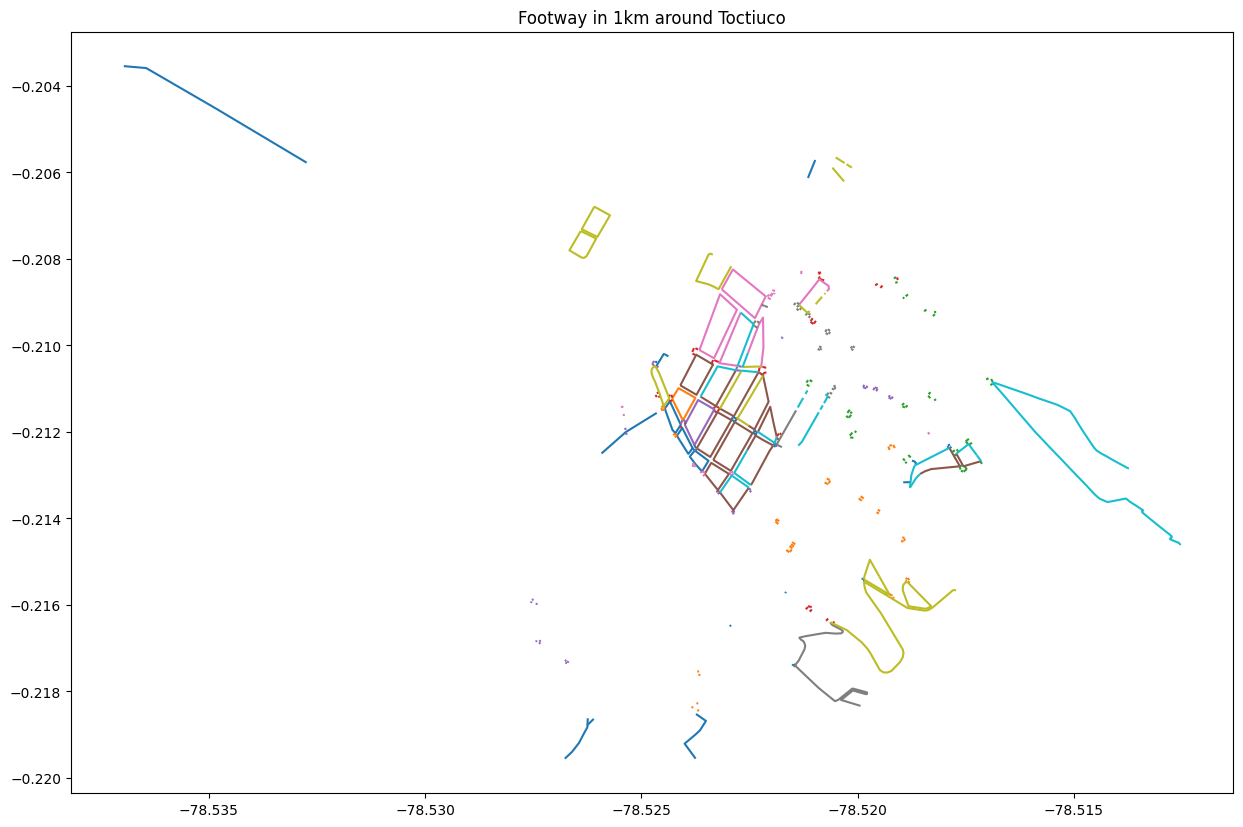

In [138]:
ax = gdf2.plot(column='geometry')
ax.set_title('Footway in 1km around Toctiuco')
plt.gcf().set_size_inches(15, 15)

Pedestrian

In [139]:
df3 = df[df.highway == 'pedestrian']


In [140]:
gdf3 = gpd.GeoDataFrame(df3, geometry='geometry')

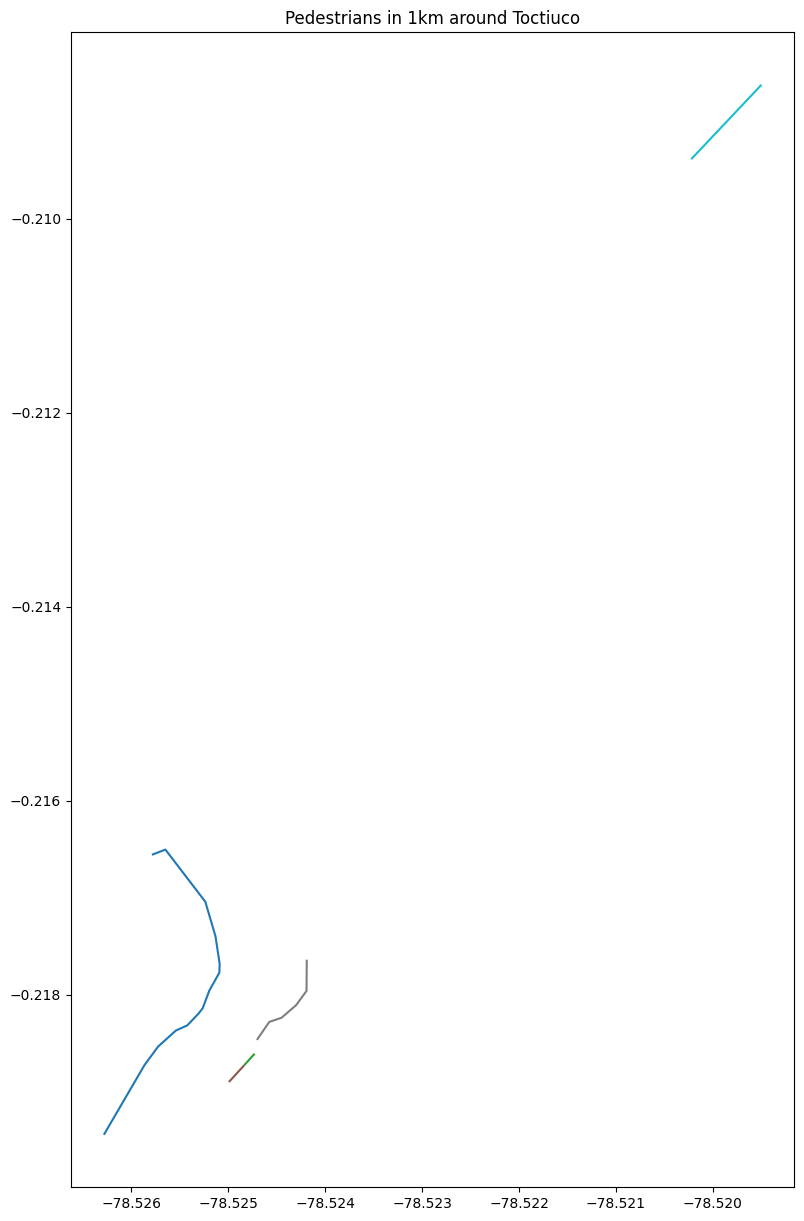

In [141]:
ax = gdf3.plot(column='geometry')
ax.set_title('Pedestrians in 1km around Toctiuco')
plt.gcf().set_size_inches(15, 15)

Residential

In [17]:
df4 = df[df.highway == 'residential']


In [142]:
gdf4 = gpd.GeoDataFrame(df4, geometry='geometry')

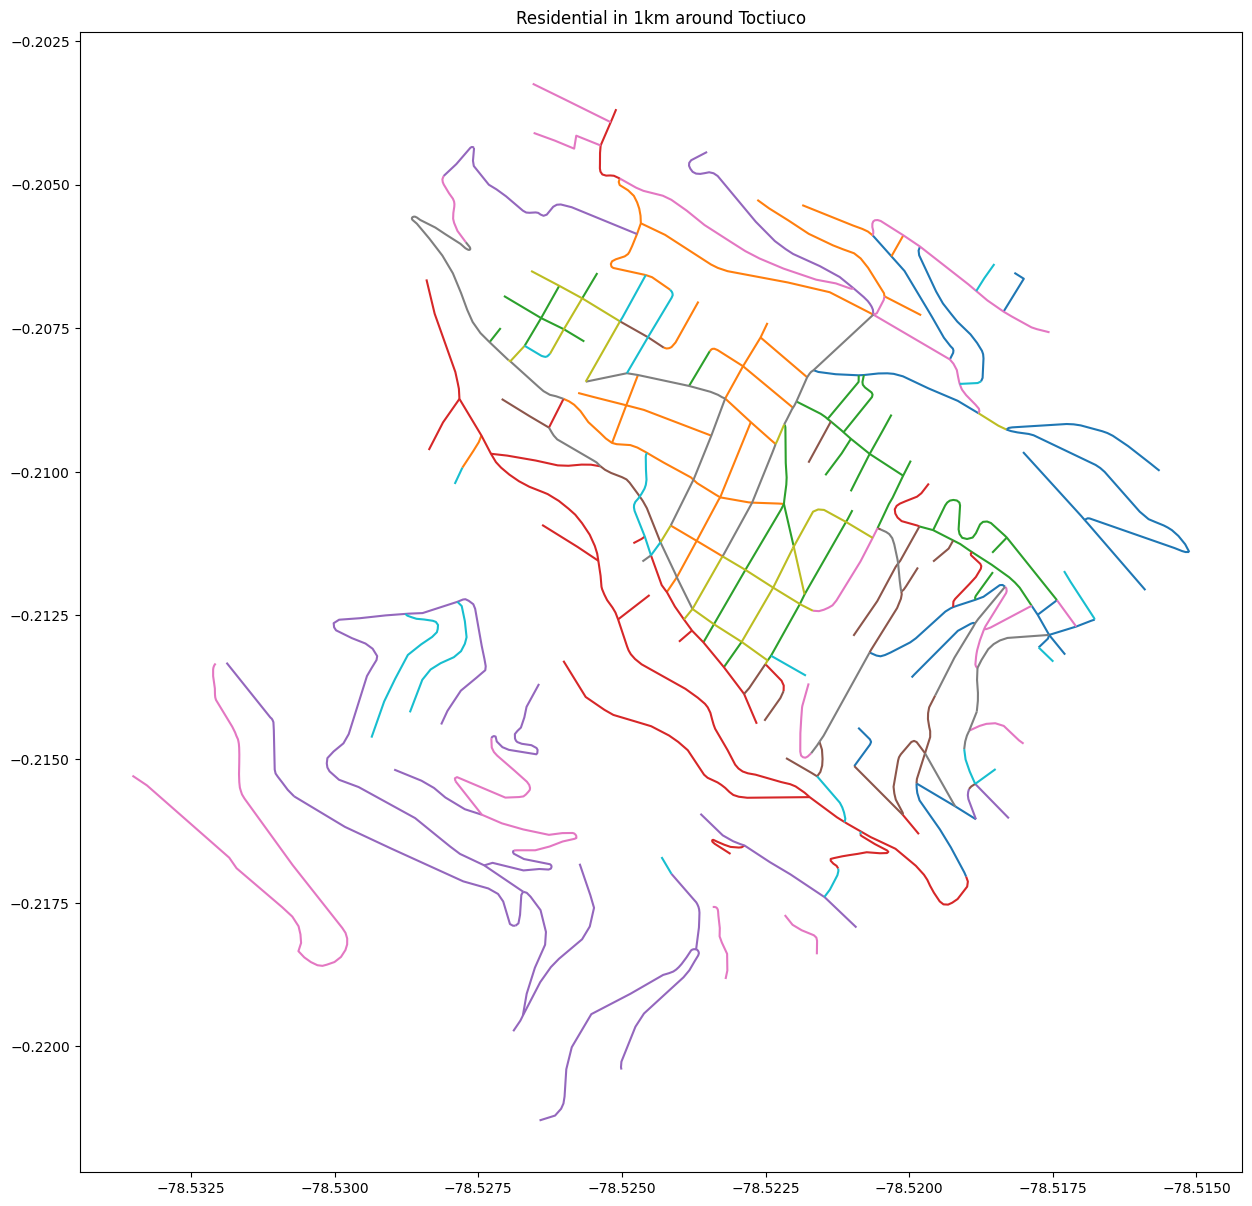

In [143]:
ax = gdf4.plot(column='geometry')
ax.set_title('Residential in 1km around Toctiuco')
plt.gcf().set_size_inches(15, 15)

Service

In [144]:
df5 = df[df.highway == 'service']


In [145]:
gdf5 = gpd.GeoDataFrame(df5, geometry='geometry')

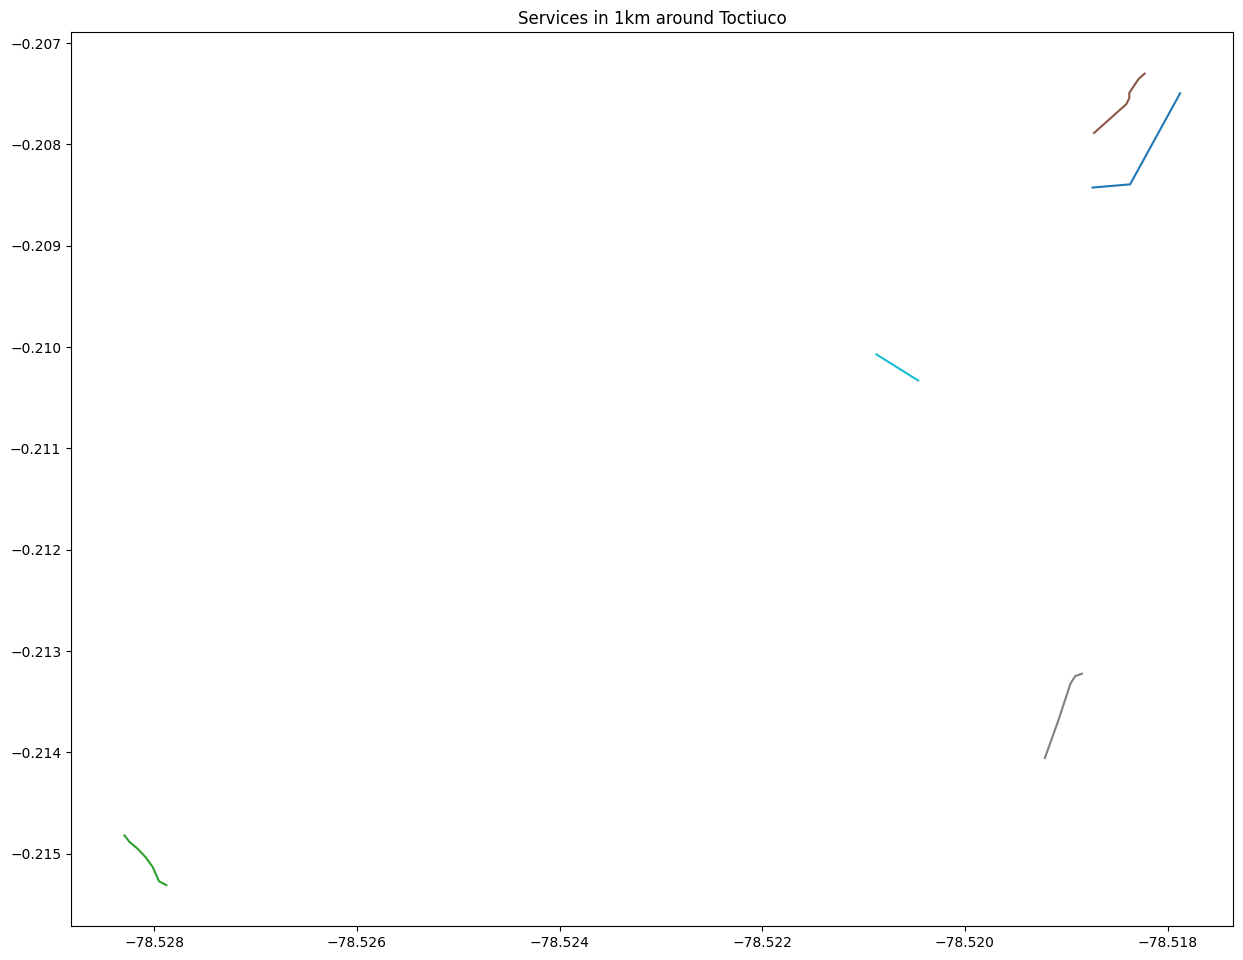

In [146]:
ax = gdf5.plot(column='geometry')
ax.set_title('Services in 1km around Toctiuco')
plt.gcf().set_size_inches(15, 15)

Unclassified

In [147]:
df6 = df[df.highway == 'unclassified']

In [148]:
gdf6 = gpd.GeoDataFrame(df6, geometry='geometry')

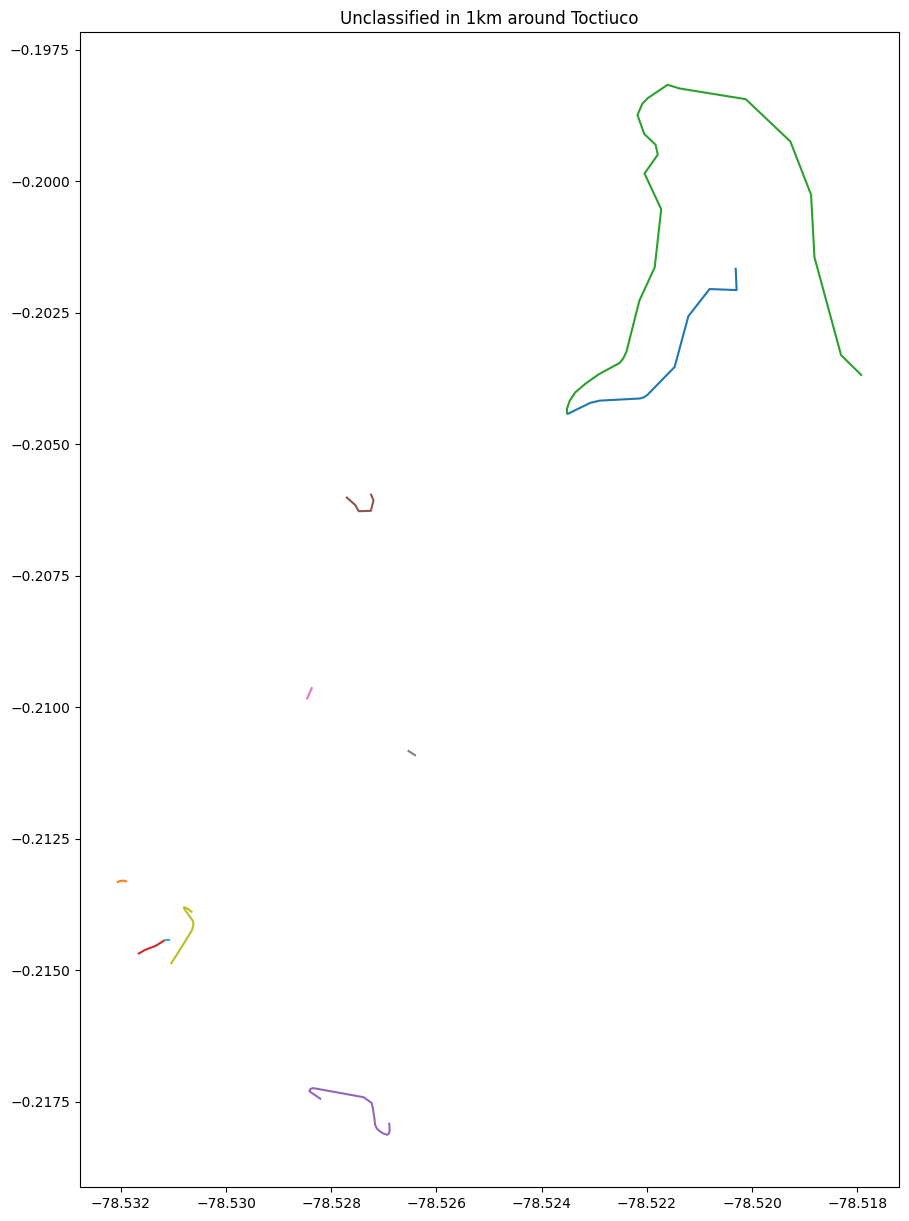

In [149]:
ax = gdf6.plot(column='geometry')
ax.set_title('Unclassified in 1km around Toctiuco')
plt.gcf().set_size_inches(15, 15)

Track

In [150]:
df7 = df[df.highway == 'track']

In [151]:
gdf7 = gpd.GeoDataFrame(df7, geometry='geometry')

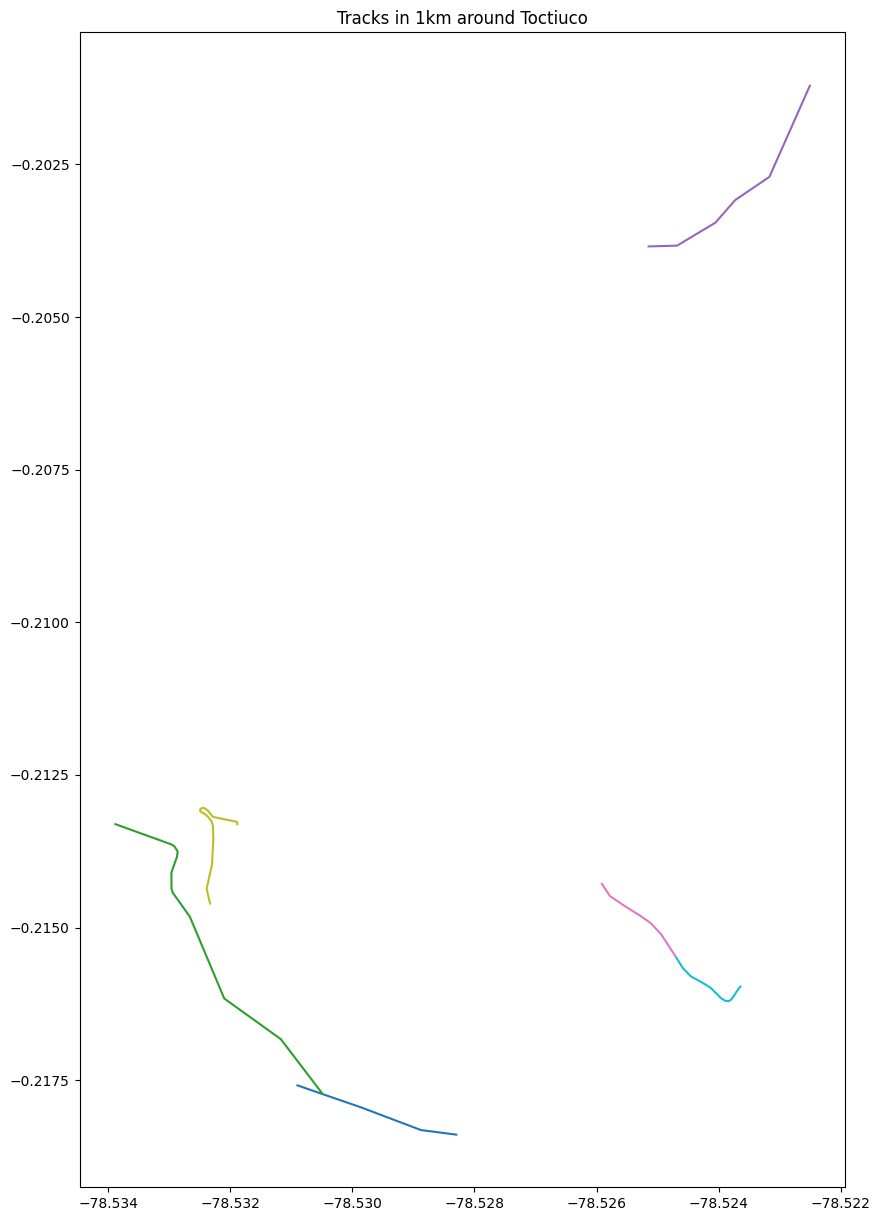

In [152]:
ax = gdf7.plot(column='geometry')
ax.set_title('Tracks in 1km around Toctiuco')
plt.gcf().set_size_inches(15, 15)

Path

In [153]:
df8 = df[df.highway == 'path']

In [154]:
gdf8 = gpd.GeoDataFrame(df8, geometry='geometry')

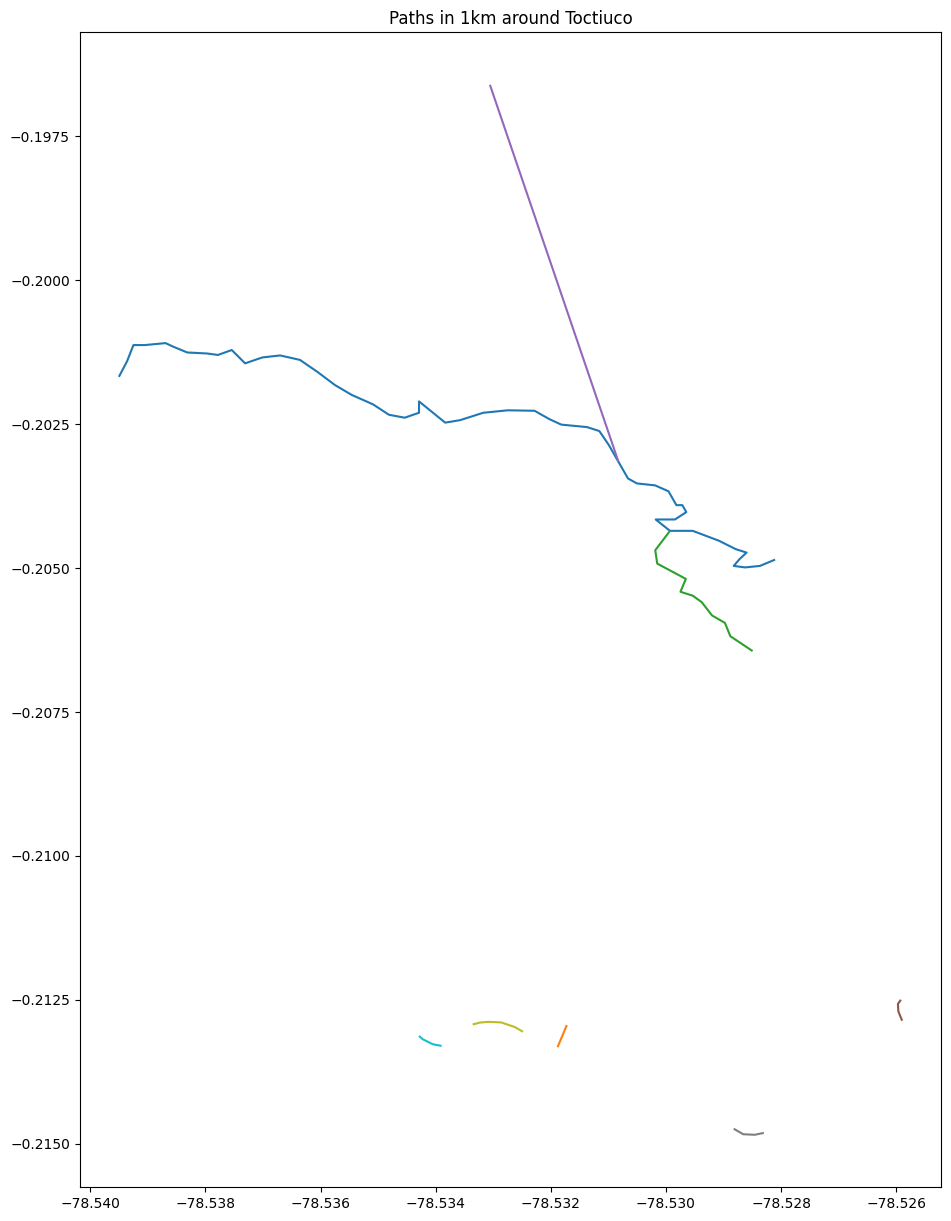

In [155]:
ax = gdf8.plot(column='geometry')
ax.set_title('Paths in 1km around Toctiuco')
plt.gcf().set_size_inches(15, 15)

La BOTA

In [156]:
# Define the latitude and longitude of the point
lat = -0.11562405304648693
lon = -78.45956887257326 

# Define the Overpass API endpoint
endpoint = "https://overpass-api.de/api/interpreter"

# Define the Overpass API query
query = '[out:json][timeout:25];(way["highway"~"motorway|trunk|primary|secondary|tertiary|unclassified|residential|service|footway|pedestrian|track|cycleway|path"](around:1000,' + str(lat) + ',' + str(lon) + '););out geom;'

# Send the request to the Overpass API
response = requests.get(endpoint, params={'data': query})

# Convert the response to JSON format
data = response.json()['elements']

# Create a pandas DataFrame to store the data
bota = pd.DataFrame(data)

In [157]:
# Extract values from the 'geometry' column and convert to LineString
geometry = [LineString([(d['lon'], d['lat']) for d in x]) for x in bota['geometry']]
bota['linestring'] = geometry

# Extract values from the 'tags' column and create new columns
bota['alt_name'] = bota['tags'].apply(lambda x: x['alt_name'] if 'alt_name' in x else None)
bota['highway'] = bota['tags'].apply(lambda x: x['highway'] if 'highway' in x else None)
bota['name'] = bota['tags'].apply(lambda x: x['name'] if 'name' in x else None)

# Drop the original 'tags' column
bota.drop(columns=['tags', 'id', 'bounds', 'nodes', 'geometry'], inplace=True)

# Rename columns
bota.rename(columns={'linestring': 'geometry'}, inplace=True)
bota = gpd.GeoDataFrame(bota, geometry='geometry')

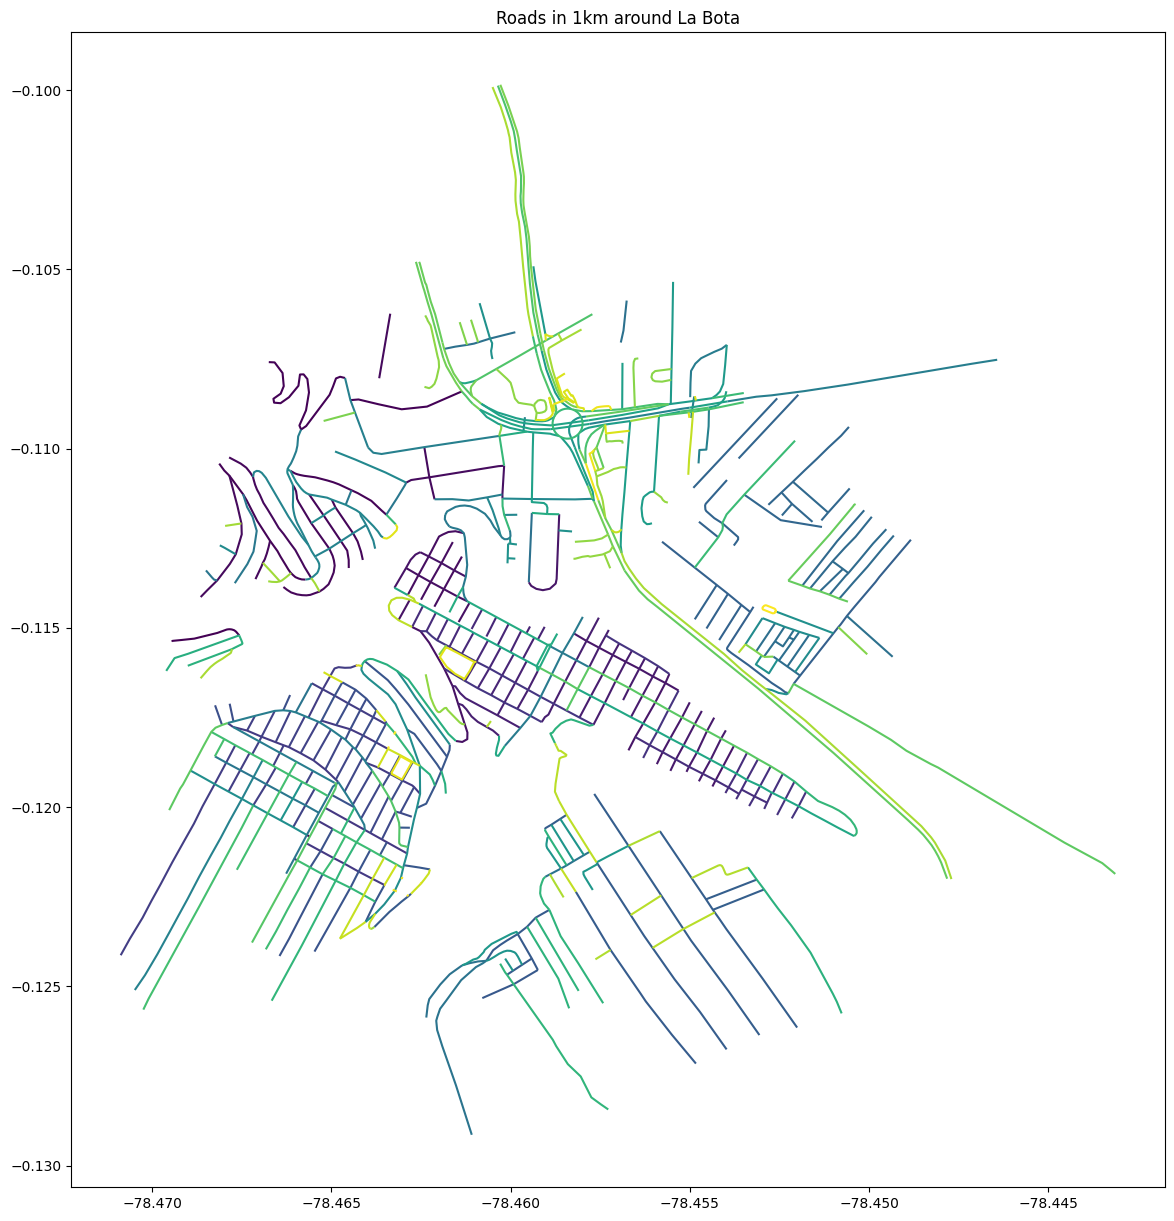

In [158]:
ax = bota.plot(column='geometry', cmap='viridis')
ax.set_title('Roads in 1km around La Bota')
plt.gcf().set_size_inches(15, 15)

In [159]:
bota.head(10)

,type,geometry,alt_name,highway,name
0,way,"LINESTRING (-78.46945 -0.11538, -78.46944 -0.1...",None,residential,None
1,way,"LINESTRING (-78.46560 -0.12082, -78.46568 -0.1...",None,residential,Joaquin Pareja
2,way,"LINESTRING (-78.46674 -0.10759, -78.46658 -0.1...",None,residential,N69j
3,way,"LINESTRING (-78.46447 -0.10865, -78.46424 -0.1...",None,residential,Jesus del Gran Poder
4,way,"LINESTRING (-78.46572 -0.11365, -78.46583 -0.1...",None,residential,De las Almendras
5,way,"LINESTRING (-78.46614 -0.11062, -78.46601 -0.1...",None,residential,De Los Geranios N69
6,way,"LINESTRING (-78.46499 -0.11142, -78.46488 -0.1...",None,residential,De los Pencos
7,way,"LINESTRING (-78.46562 -0.11128, -78.46521 -0.1...",None,residential,De los Tulipes
8,way,"LINESTRING (-78.46607 -0.11102, -78.46602 -0.1...",None,residential,De las Lilas
9,way,"LINESTRING (-78.46556 -0.11361, -78.46575 -0.1...",None,residential,De los Pensamientos


In [160]:
bota.highway.unique()

array(['residential', 'tertiary', 'service', 'unclassified', 'trunk',
       'footway', 'path', 'trunk_link', 'track', 'secondary', 'primary',
       'cycleway', 'secondary_link'], dtype=object)

Footway la bota

In [164]:
bota1 = bota[bota.highway == 'footway']

In [165]:
gdf9 = gpd.GeoDataFrame(bota1, geometry='geometry')

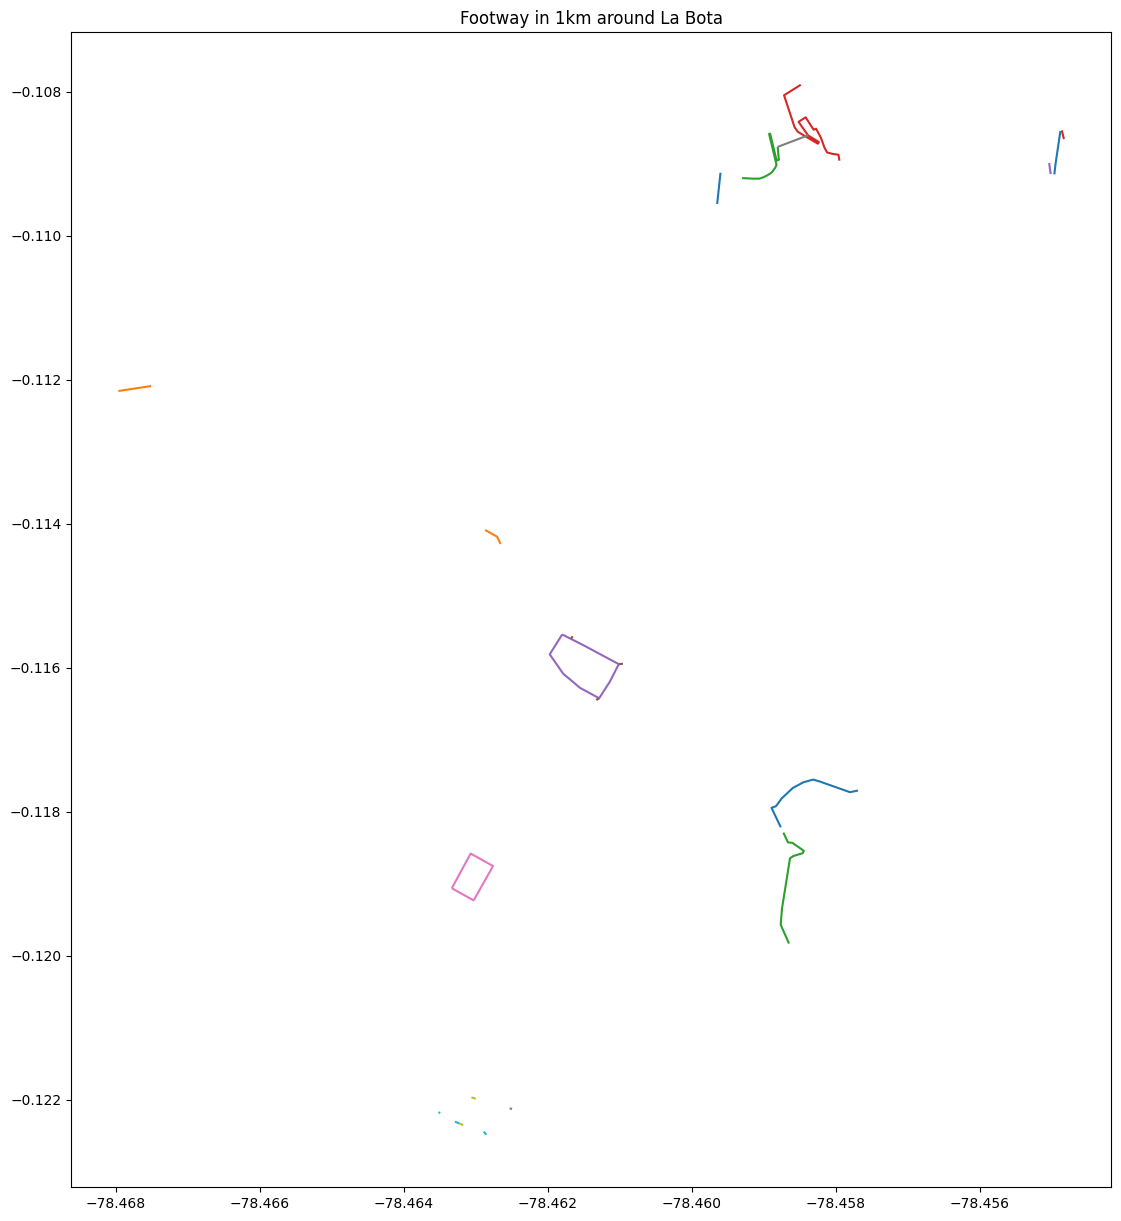

In [166]:
ax = gdf9.plot(column='geometry')
ax.set_title('Footway in 1km around La Bota')
plt.gcf().set_size_inches(15, 15)

Pedestrian La bota

In [197]:
bota2 = bota[bota.highway == 'pedestrian']

In [198]:
bota2.head()

,type,geometry,alt_name,highway,name


In [199]:
gdf10 = gpd.GeoDataFrame(bota2, geometry='geometry')

c:\Users\diana\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


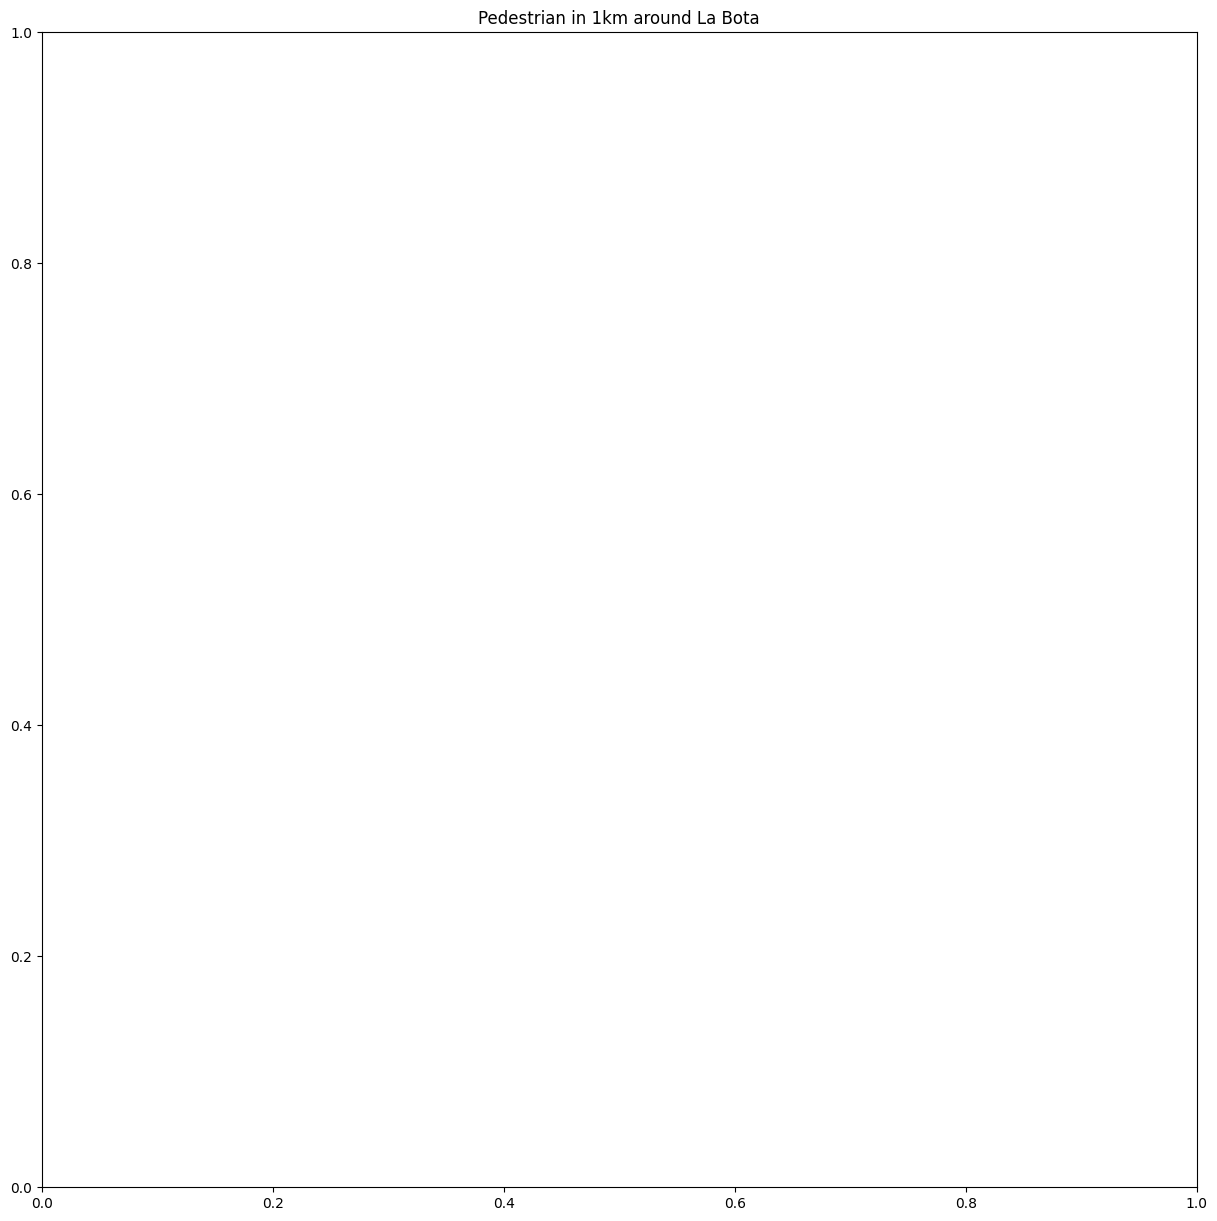

In [200]:
ax = gdf10.plot(column='geometry')
ax.set_title('Pedestrian in 1km around La Bota')
plt.gcf().set_size_inches(15, 15)

Services la bota

In [181]:
bota3 = bota[bota.highway == 'service']

In [182]:
gdf11 = gpd.GeoDataFrame(bota3, geometry='geometry')

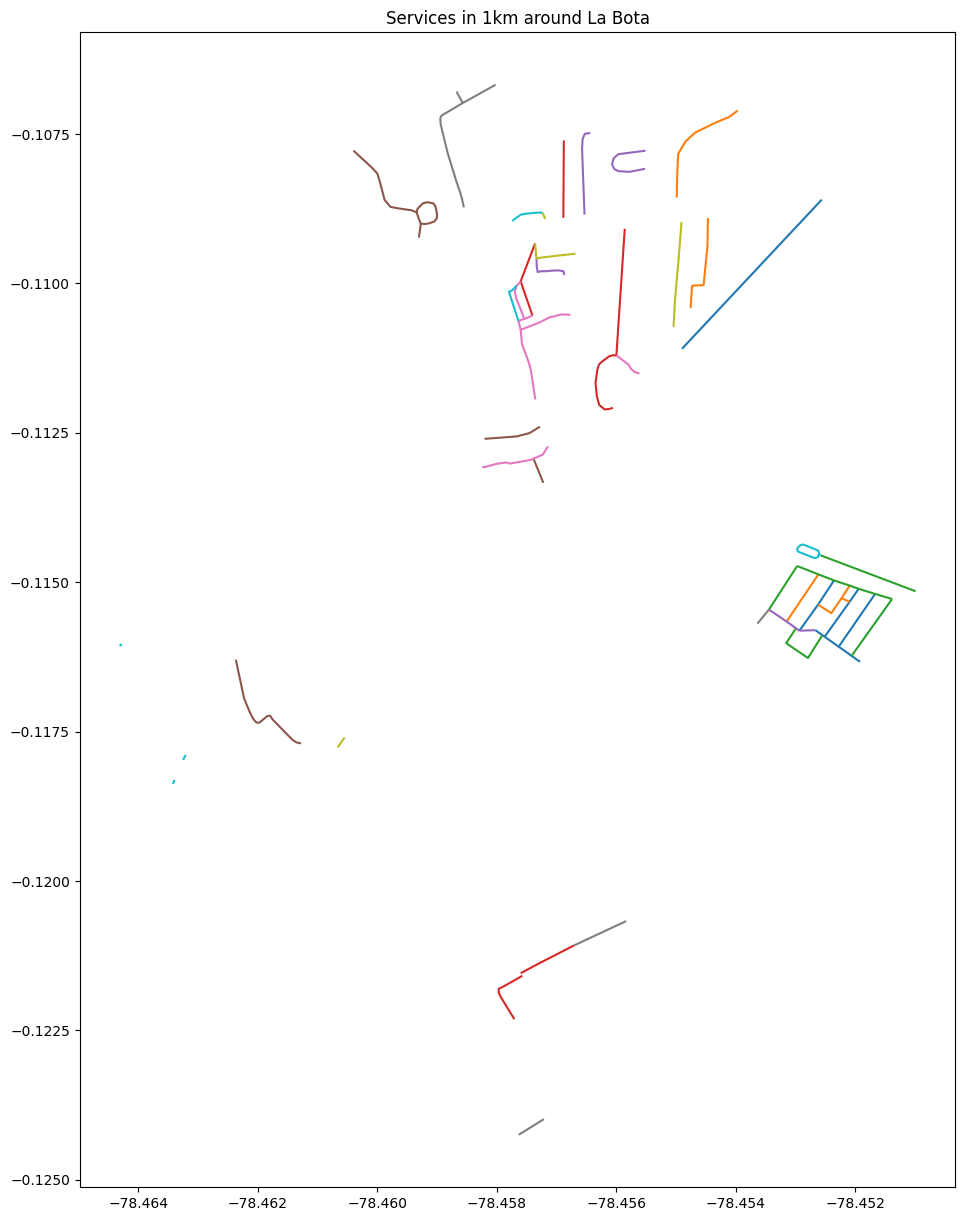

In [183]:
ax = gdf11.plot(column='geometry')
ax.set_title('Services in 1km around La Bota')
plt.gcf().set_size_inches(15, 15)

Residential la bota 

In [184]:
bota4 = bota[bota.highway == 'residential']

In [185]:
gdf12 = gpd.GeoDataFrame(bota4, geometry='geometry')

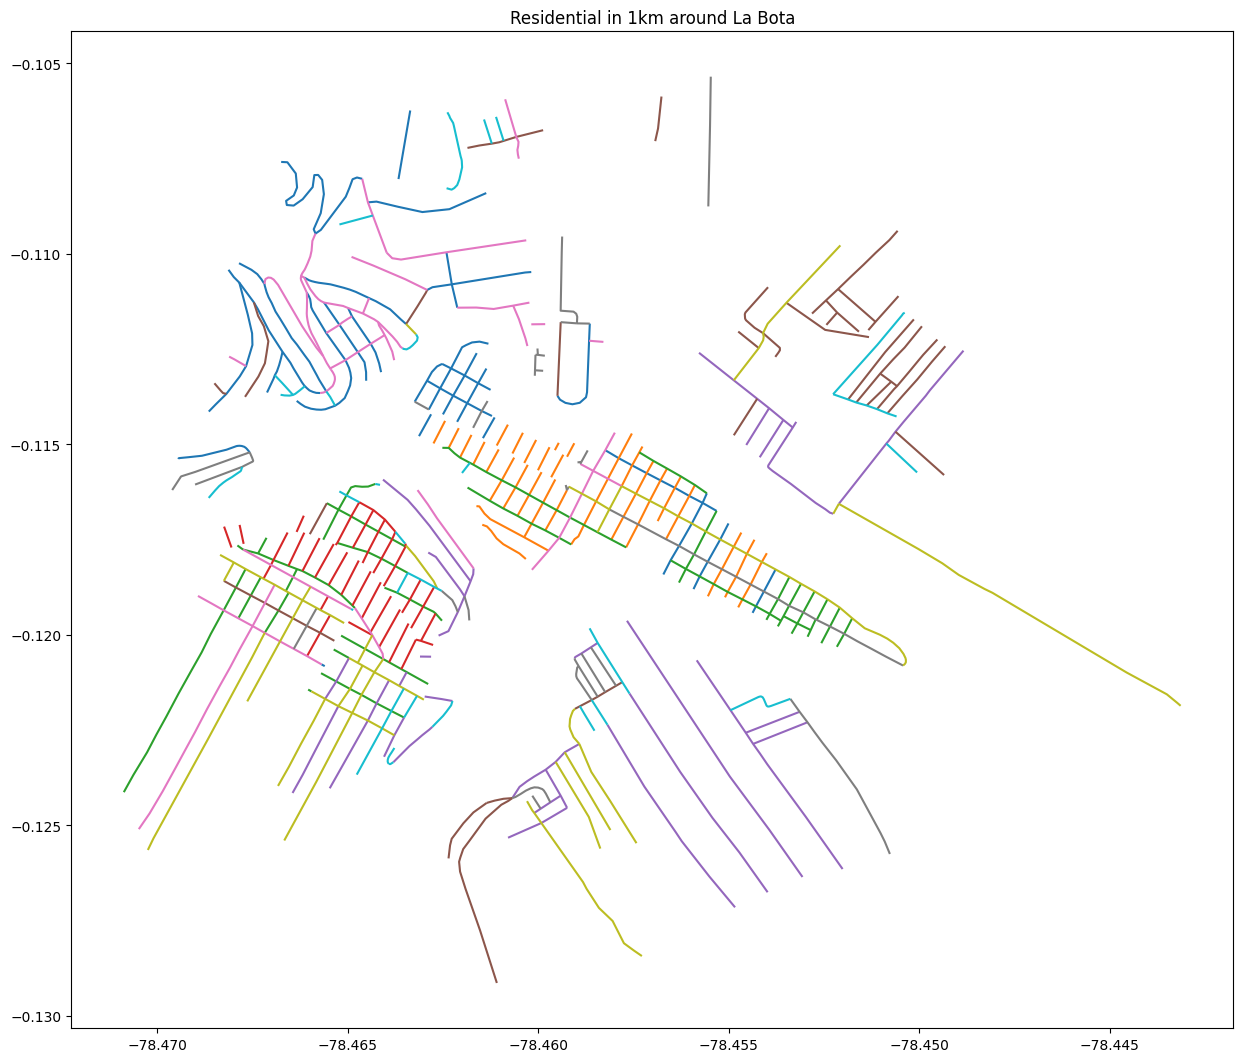

In [186]:
ax = gdf12.plot(column='geometry')
ax.set_title('Residential in 1km around La Bota')
plt.gcf().set_size_inches(15, 15)

Paths

In [188]:
bota5 = bota[bota.highway == 'path']

In [189]:
gdf13 = gpd.GeoDataFrame(bota5, geometry='geometry')

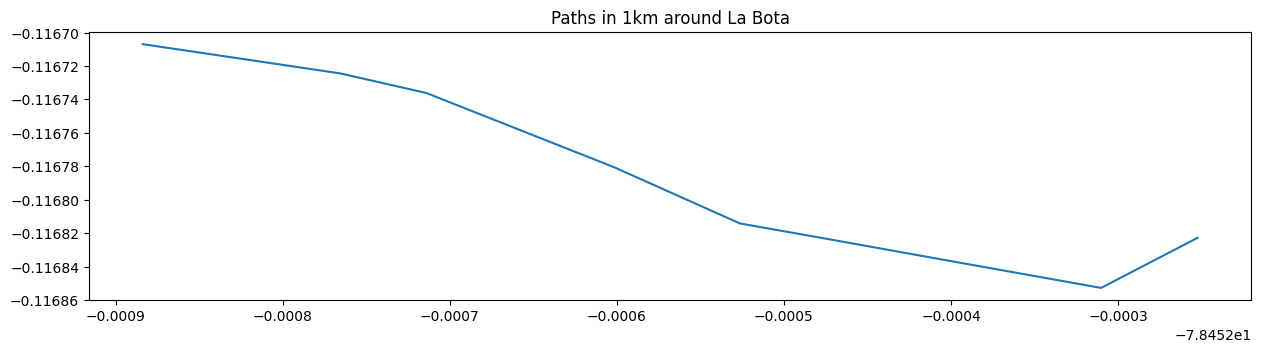

In [190]:
ax = gdf13.plot(column='geometry')
ax.set_title('Paths in 1km around La Bota')
plt.gcf().set_size_inches(15, 15)

Unclassified

In [191]:
bota6 = bota[bota.highway == 'unclassified']


In [192]:
gdf14 = gpd.GeoDataFrame(bota6, geometry='geometry')

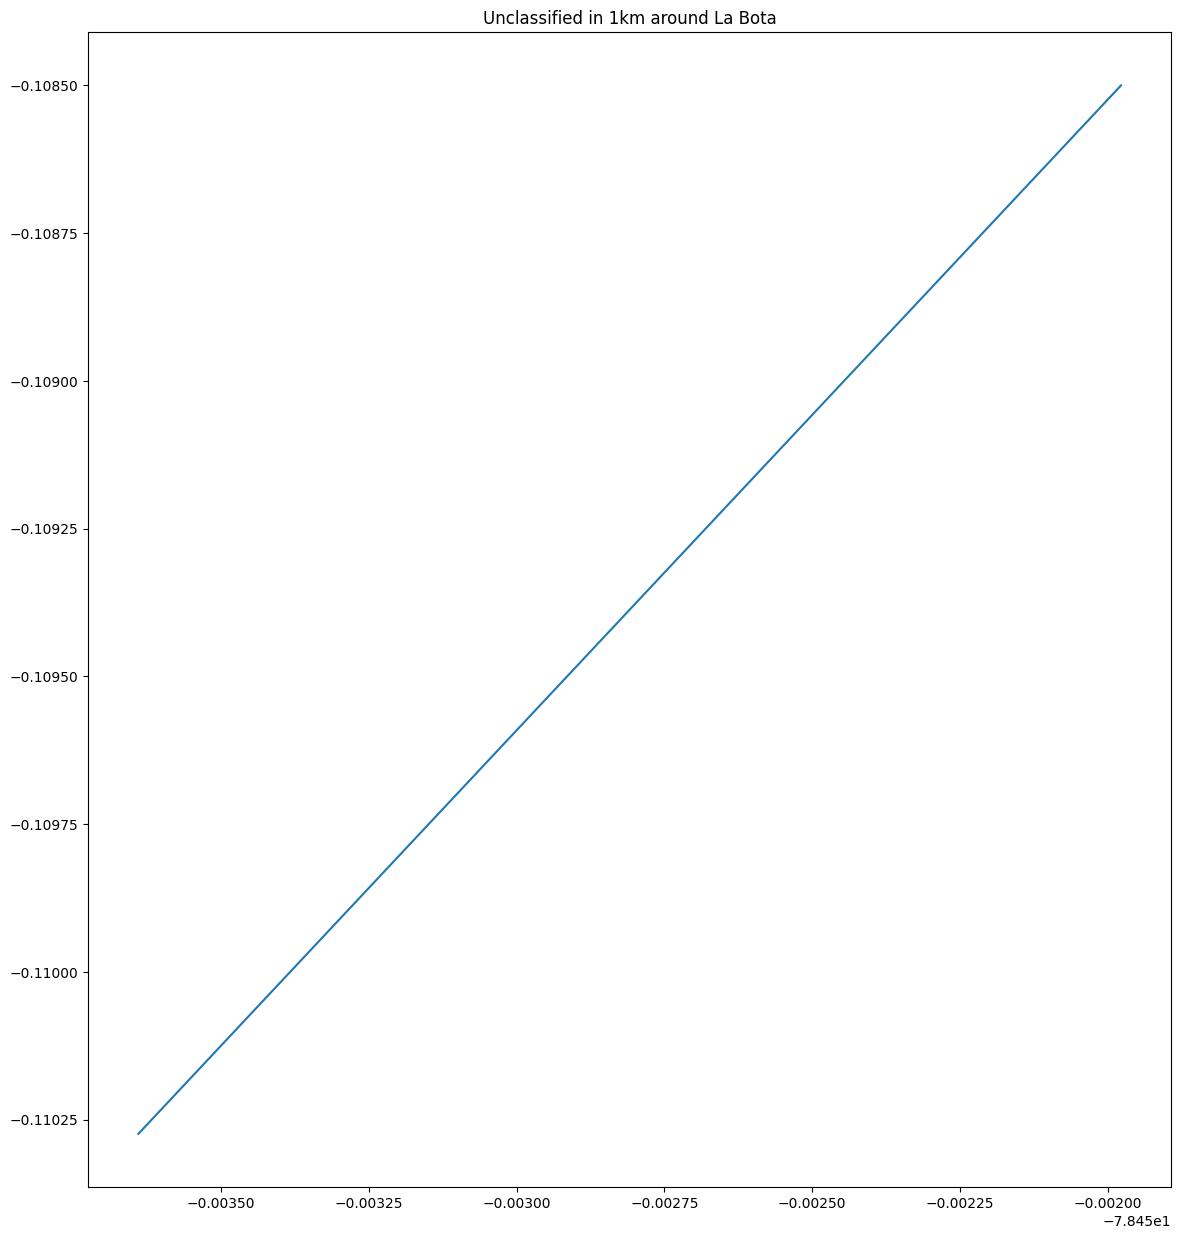

In [193]:
ax = gdf14.plot(column='geometry')
ax.set_title('Unclassified in 1km around La Bota')
plt.gcf().set_size_inches(15, 15)

Track

In [194]:
bota7 = bota[bota.highway == 'track']

In [195]:
gdf15 = gpd.GeoDataFrame(bota7, geometry='geometry')

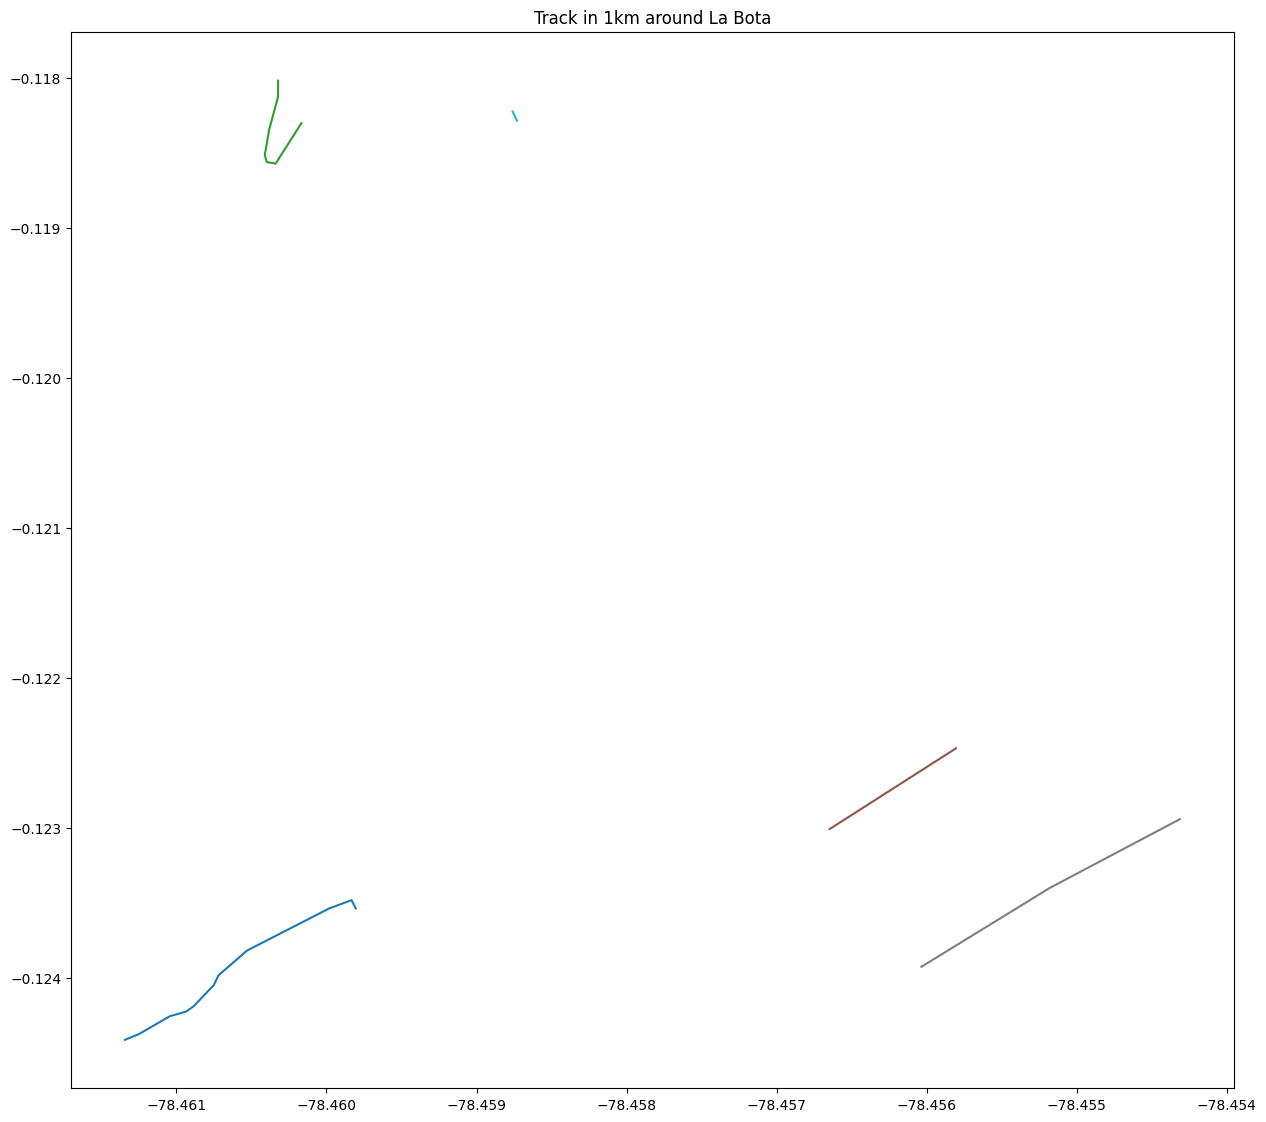

In [196]:
ax = gdf15.plot(column='geometry')
ax.set_title('Track in 1km around La Bota')
plt.gcf().set_size_inches(15, 15)